# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

649

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
response = requests.get(f"http://api.openweathermap.org/data/2.5/weather?q=seattle&appid={weather_api_key}").json()
response["coord"]["lon"]
print(response)

{'coord': {'lon': -122.33, 'lat': 47.61}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 295.49, 'feels_like': 292.71, 'temp_min': 292.59, 'temp_max': 298.15, 'pressure': 1017, 'humidity': 50}, 'visibility': 10000, 'wind': {'speed': 4.6, 'deg': 300, 'gust': 8.7}, 'clouds': {'all': 20}, 'dt': 1597803498, 'sys': {'type': 1, 'id': 3417, 'country': 'US', 'sunrise': 1597756207, 'sunset': 1597806975}, 'timezone': -25200, 'id': 5809844, 'name': 'Seattle', 'cod': 200}


In [4]:
#EXAMPLE EXAMPLE
#responses = []
#set_counter = 0
#counter = 0

#for city in cities:
#    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    
#    response = requests.get(url)
#    responses.append(response)
   
#    if set_counter == 50:
#        set_counter += 1
    
#    if counter == 40:
#        break
        
#print("Processing Record %s of Set %s | %s" % (counter, set_counter, city))

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
# Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

# Create endpoint URL with each city
    city_url = url + "&q=" + city
    
# Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

# Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities
    try:
# Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

# Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_cloudiness = city_weather["clouds"]["all"]
        city_wind_speed = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
# Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng,
                          "Max Temp" : city_max_temp, 
                          "Humidity": city_humidity,
                          "Cloudiness" : city_cloudiness,
                          "Wind Speed" : city_wind_speed,
                          "Country" :  city_country,
                          "Date": city_date})

# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atherton
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | fortuna
Processing Record 4 of Set 1 | meyungs
City not found. Skipping...
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | pucallpa
Processing Record 8 of Set 1 | gigmoto
Processing Record 9 of Set 1 | ribas do rio pardo
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 15 of Set 1 | pacific grove
Processing Record 16 of Set 1 | hofn
Processing Record 17 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | mataura
Processing Reco

Processing Record 37 of Set 4 | comodoro rivadavia
Processing Record 38 of Set 4 | nouadhibou
Processing Record 39 of Set 4 | esperance
Processing Record 40 of Set 4 | inirida
Processing Record 41 of Set 4 | namibe
Processing Record 42 of Set 4 | nixa
Processing Record 43 of Set 4 | tromso
Processing Record 44 of Set 4 | chagda
City not found. Skipping...
Processing Record 45 of Set 4 | kedougou
Processing Record 46 of Set 4 | vila velha
Processing Record 47 of Set 4 | avarua
Processing Record 48 of Set 4 | itarema
Processing Record 49 of Set 4 | vaitape
Processing Record 0 of Set 5 | lata
Processing Record 1 of Set 5 | san pedro de macoris
Processing Record 2 of Set 5 | longyearbyen
Processing Record 3 of Set 5 | razdolinsk
Processing Record 4 of Set 5 | kurmanayevka
Processing Record 5 of Set 5 | chegutu
Processing Record 6 of Set 5 | liepaja
Processing Record 7 of Set 5 | ust-tsilma
Processing Record 8 of Set 5 | talnakh
Processing Record 9 of Set 5 | baykit
Processing Record 10 of 

Processing Record 27 of Set 8 | dunedin
Processing Record 28 of Set 8 | ust-koksa
Processing Record 29 of Set 8 | maningrida
Processing Record 30 of Set 8 | terra santa
Processing Record 31 of Set 8 | spirovo
Processing Record 32 of Set 8 | marquette
Processing Record 33 of Set 8 | jamui
Processing Record 34 of Set 8 | kuche
City not found. Skipping...
Processing Record 35 of Set 8 | tonj
Processing Record 36 of Set 8 | aborlan
Processing Record 37 of Set 8 | guaruja
Processing Record 38 of Set 8 | albion
Processing Record 39 of Set 8 | karaul
City not found. Skipping...
Processing Record 40 of Set 8 | george
Processing Record 41 of Set 8 | hutchinson
Processing Record 42 of Set 8 | qarchi gak
Processing Record 43 of Set 8 | dudinka
Processing Record 44 of Set 8 | cam ranh
Processing Record 45 of Set 8 | miranda
Processing Record 46 of Set 8 | dubai
Processing Record 47 of Set 8 | sembakung
Processing Record 48 of Set 8 | excelsior springs
Processing Record 49 of Set 8 | trat
Processin

Processing Record 16 of Set 12 | santander
Processing Record 17 of Set 12 | itaituba
Processing Record 18 of Set 12 | centralina
Processing Record 19 of Set 12 | adrar
Processing Record 20 of Set 12 | hami
Processing Record 21 of Set 12 | pozo colorado
Processing Record 22 of Set 12 | storsteinnes
Processing Record 23 of Set 12 | alta floresta
Processing Record 24 of Set 12 | mildura
Processing Record 25 of Set 12 | madimba
Processing Record 26 of Set 12 | kampene
Processing Record 27 of Set 12 | raahe
Processing Record 28 of Set 12 | okha
Processing Record 29 of Set 12 | saint-joseph
Processing Record 30 of Set 12 | martil
Processing Record 31 of Set 12 | suba
Processing Record 32 of Set 12 | khandbari
Processing Record 33 of Set 12 | tadine
Processing Record 34 of Set 12 | ilo
Processing Record 35 of Set 12 | hobyo
Processing Record 36 of Set 12 | poum
Processing Record 37 of Set 12 | kruisfontein
Processing Record 38 of Set 12 | porto walter
Processing Record 39 of Set 12 | dickinso

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          603
Lat           603
Lng           603
Max Temp      603
Humidity      603
Cloudiness    603
Wind Speed    603
Country       603
Date          603
dtype: int64

In [11]:
output_data_file = "output_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atherton,53.52,-2.49,61.00,90,37,1.01,GB,1597804010
1,new norfolk,-42.78,147.06,54.00,77,23,1.01,AU,1597803962
2,fortuna,40.60,-124.16,66.99,74,3,1.99,US,1597803962
3,punta arenas,-53.15,-70.92,33.80,69,78,6.93,CL,1597803891
4,busselton,-33.65,115.33,59.00,60,45,1.92,AU,1597804011


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
# Get the indices of cities that have humidity over 100%.
# Extract relevant fields from the data frame
# Export the City_Data into a csv
humidity_check = city_data_df.loc[(city_data_df["Humidity"] > 100)]
humidity_check.count()

City          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Date          0
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [13]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atherton,53.52,-2.49,61.00,90,37,1.01,GB,1597804010
1,new norfolk,-42.78,147.06,54.00,77,23,1.01,AU,1597803962
2,fortuna,40.60,-124.16,66.99,74,3,1.99,US,1597803962
3,punta arenas,-53.15,-70.92,33.80,69,78,6.93,CL,1597803891
4,busselton,-33.65,115.33,59.00,60,45,1.92,AU,1597804011


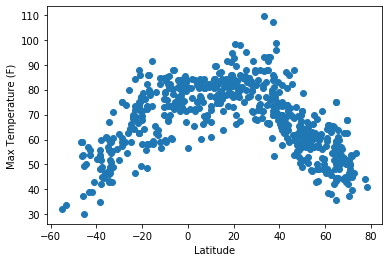

In [14]:
# Use city_data_df to crate scatter plot
# Generate a scatter plot of latitude vs. temperature
#TO DO: Add "Latitude vs. Max Temperature (08/18/20)"
plt.scatter((city_data_df["Lat"]), (city_data_df["Max Temp"]))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

## Latitude vs. Humidity Plot

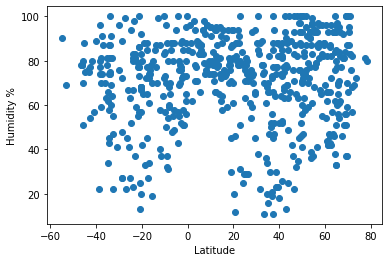

In [15]:
# Use city_data_df to crate scatter plot
# Generate a scatter plot of latitude vs. humidity
#TO DO: Add "Latitude vs. Humidity (08/18/20)"

plt.scatter((city_data_df["Lat"]), (city_data_df["Humidity"]))
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

## Latitude vs. Cloudiness Plot

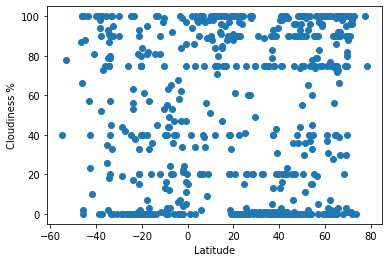

In [16]:
# Use city_data_df to crate scatter plot
# Generate a scatter plot of latitude vs. cloudiness
#TO DO: Add "Latitude vs. Cloudiness (08/18/20)"

plt.scatter((city_data_df["Lat"]), (city_data_df["Cloudiness"]))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

## Latitude vs. Wind Speed Plot

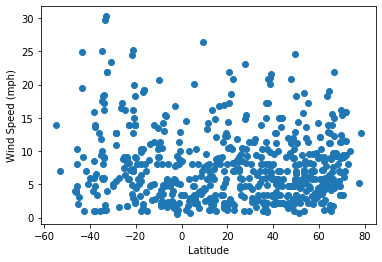

In [17]:
# Use city_data_df to crate scatter plot
# Generate a scatter plot of latitude vs. cloudiness
#TO DO: Add "Latitude vs. Wind Speed (08/18/20)"

plt.scatter((city_data_df["Lat"]), (city_data_df["Wind Speed"]))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

## Linear Regression

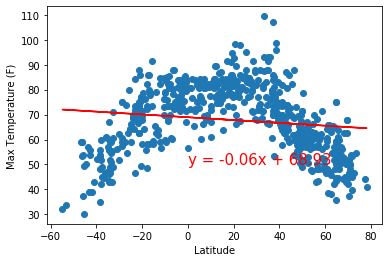

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots
# linear Regression
city_data_df

(slope, intercept, rvalue, pvalue, stderr) = linregress((city_data_df["Lat"]), (city_data_df["Max Temp"]))
regress_values = (city_data_df["Lat"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter((city_data_df["Lat"]), (city_data_df["Max Temp"]))
plt.plot((city_data_df["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

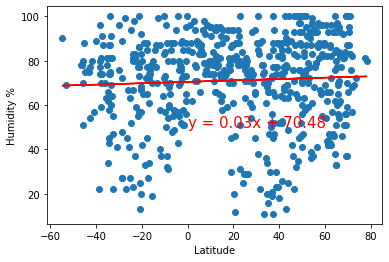

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress((city_data_df["Lat"]), (city_data_df["Humidity"]))
regress_values = (city_data_df["Lat"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter((city_data_df["Lat"]), (city_data_df["Humidity"]))
plt.plot((city_data_df["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

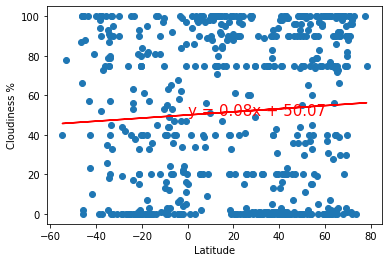

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress((city_data_df["Lat"]), (city_data_df["Cloudiness"]))
regress_values = (city_data_df["Lat"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter((city_data_df["Lat"]), (city_data_df["Cloudiness"]))
plt.plot((city_data_df["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

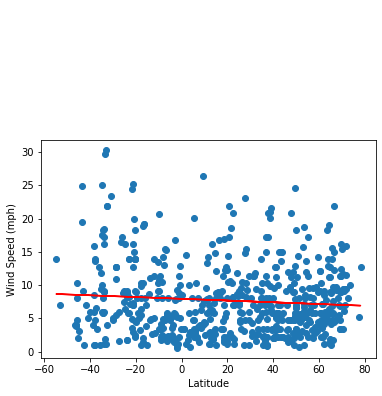

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress((city_data_df["Lat"]), (city_data_df["Wind Speed"]))
regress_values = (city_data_df["Lat"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter((city_data_df["Lat"]), (city_data_df["Wind Speed"]))
plt.plot((city_data_df["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

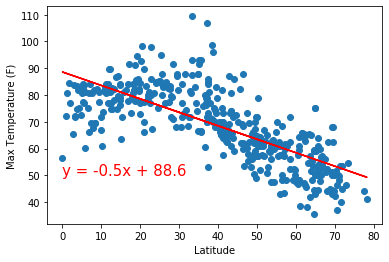

In [22]:
northern_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress((northern_hemisphere["Lat"]), (northern_hemisphere["Max Temp"]))
regress_values = (northern_hemisphere["Lat"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter((northern_hemisphere["Lat"]), (northern_hemisphere["Max Temp"]))
plt.plot((northern_hemisphere["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

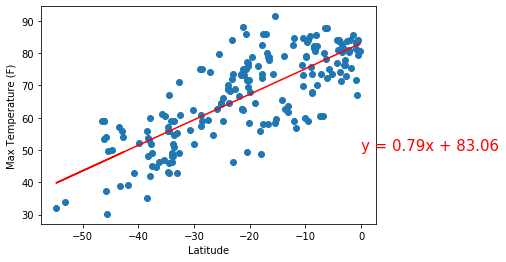

In [23]:
southern_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress((southern_hemisphere["Lat"]), (southern_hemisphere["Max Temp"]))
regress_values = (southern_hemisphere["Lat"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter((southern_hemisphere["Lat"]), (southern_hemisphere["Max Temp"]))
plt.plot((southern_hemisphere["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

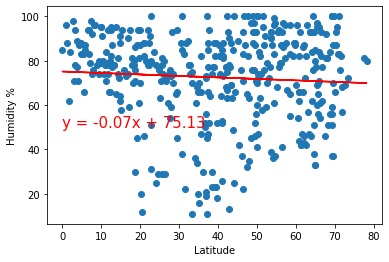

In [24]:
northern_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress((northern_hemisphere["Lat"]), (northern_hemisphere["Humidity"]))
regress_values = (northern_hemisphere["Lat"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter((northern_hemisphere["Lat"]), (northern_hemisphere["Humidity"]))
plt.plot((northern_hemisphere["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

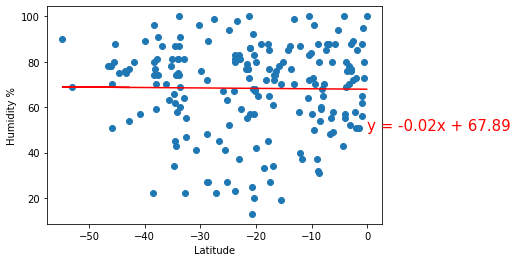

In [25]:
southern_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress((southern_hemisphere["Lat"]), (southern_hemisphere["Humidity"]))
regress_values = (southern_hemisphere["Lat"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter((southern_hemisphere["Lat"]), (southern_hemisphere["Humidity"]))
plt.plot((southern_hemisphere["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

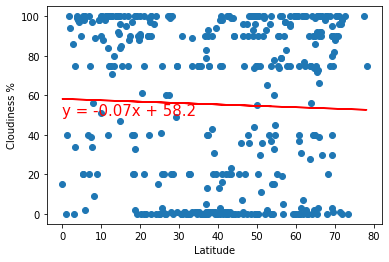

In [26]:
northern_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress((northern_hemisphere["Lat"]), (northern_hemisphere["Cloudiness"]))
regress_values = (northern_hemisphere["Lat"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter((northern_hemisphere["Lat"]), (northern_hemisphere["Cloudiness"]))
plt.plot((northern_hemisphere["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

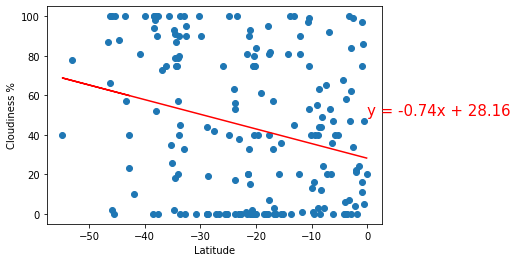

In [27]:
southern_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress((southern_hemisphere["Lat"]), (southern_hemisphere["Cloudiness"]))
regress_values = (southern_hemisphere["Lat"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter((southern_hemisphere["Lat"]), (southern_hemisphere["Cloudiness"]))
plt.plot((southern_hemisphere["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

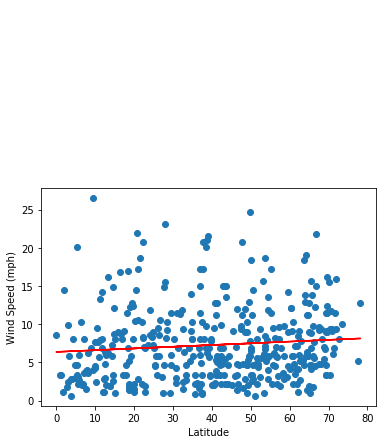

In [28]:
northern_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress((northern_hemisphere["Lat"]), (northern_hemisphere["Wind Speed"]))
regress_values = (northern_hemisphere["Lat"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter((northern_hemisphere["Lat"]), (northern_hemisphere["Wind Speed"]))
plt.plot((northern_hemisphere["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

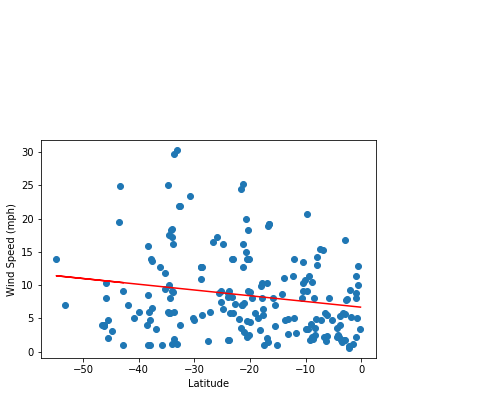

In [29]:
# Create Northern and Southern Hemisphere DataFrames
# Start with clean_df then use the .loc method to find where the northern and souther
southern_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress((southern_hemisphere["Lat"]), (southern_hemisphere["Wind Speed"]))
regress_values = (southern_hemisphere["Lat"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter((southern_hemisphere["Lat"]), (southern_hemisphere["Wind Speed"]))
plt.plot((southern_hemisphere["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()